I want to look if there is any difference in learning methods and resources between students and nonstudents. Does working experience influence the choice of media sources, learning platforms or not? What respondents think about online learning? 

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

#Loading answers for multiple choice questions
data = pd.read_csv('multipleChoiceResponses.csv', low_memory=False)

#Delete first row, containing question
data = data[1:]

#Create to dataset for students and professionals
students = data[data['Q6'] == 'Student']
prof = data[data['Q6'] != 'Student']

Let's start with some general information about respondents.<br><br>

**1. Gender diversity**<br>
There is not a big difference between these two groups. Still, there are much more men than woman in this field.

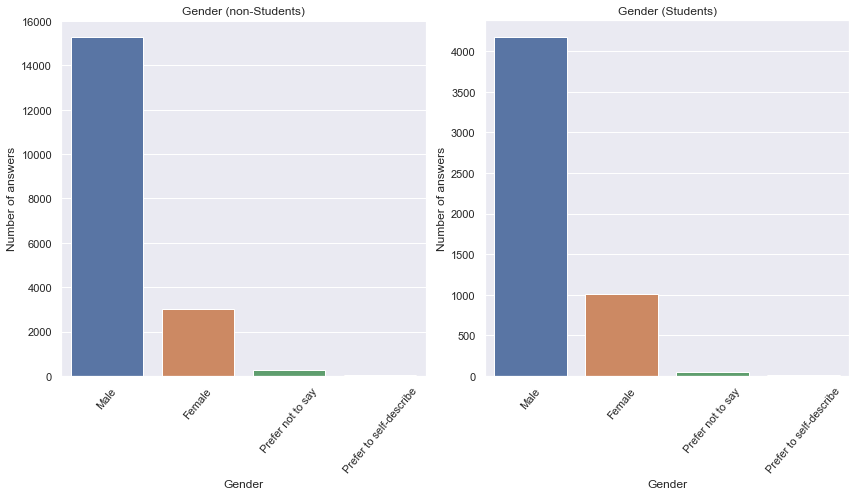

In [3]:
plt.figure(figsize=(12,7))

#Draw first suplot
plt.subplot(121)
sns.countplot(x=prof['Q1'], data=prof, order=prof['Q1'].value_counts().index)
plt.title("Gender (non-Students)")
plt.xlabel("Gender")
plt.ylabel("Number of answers")
plt.xticks(rotation=50)

#Draw second subplot    
plt.subplot(122)
sns.countplot(x=students['Q1'], data=students, order=students['Q1'].value_counts().index)
plt.title("Gender (Students)")
plt.xlabel("Gender")
plt.ylabel("Number of answers")
plt.xticks(rotation=50)

plt.tight_layout()
plt.show()

**2. Age**<br>
I don't expect any surprises here. Let's just make an assumption "Students are younger" and look how data will prove it.<br>
So, yes, the majority of student respondents are between 18 and 24 years old. 

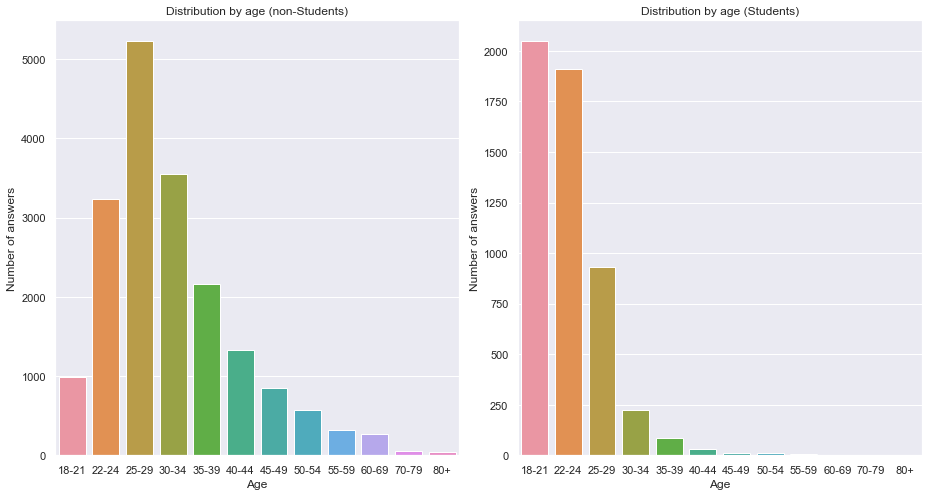

In [4]:
plt.figure(figsize=(13,7))

#1st subplot
plt.subplot(121)
ax = sns.countplot(x=prof['Q2'].fillna(0), data=prof, order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69','70-79','80+'])
plt.title("Distribution by age (non-Students)")
plt.xlabel("Age")
plt.ylabel("Number of answers")
    
#2nd subplot    
plt.subplot(122)
ax = sns.countplot(x=students['Q2'].fillna(0), data=students, order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69','70-79','80+'])
plt.title("Distribution by age (Students)")
plt.xlabel("Age")
plt.ylabel("Number of answers")
    
plt.tight_layout()
plt.show()

**3. Country**<br>
Top3 countries are the same for both groups, but the majority of students respondents are from India.

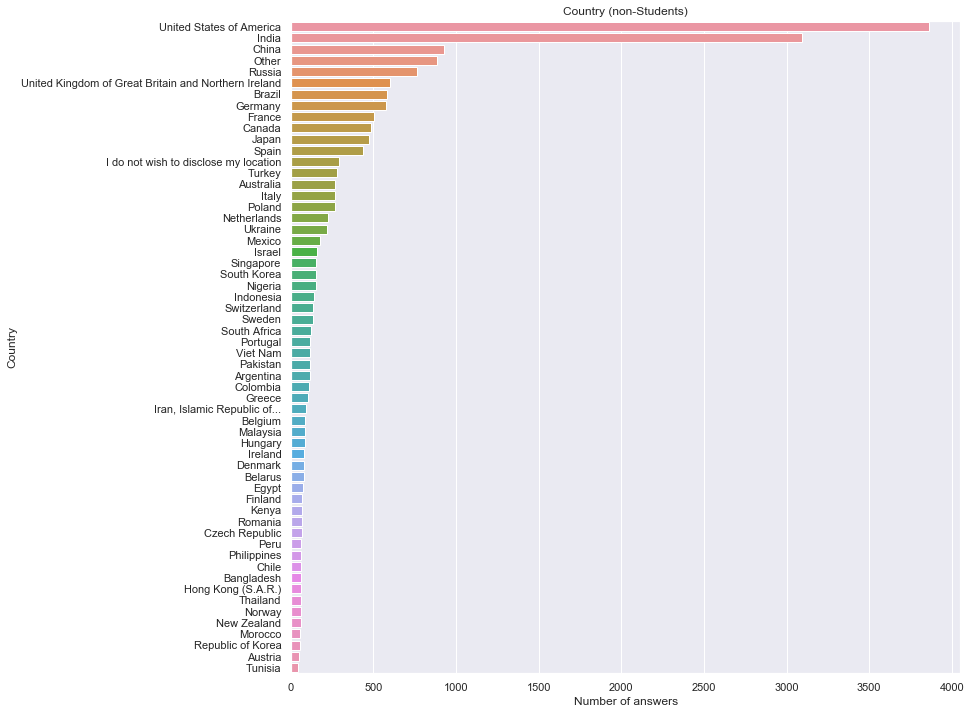

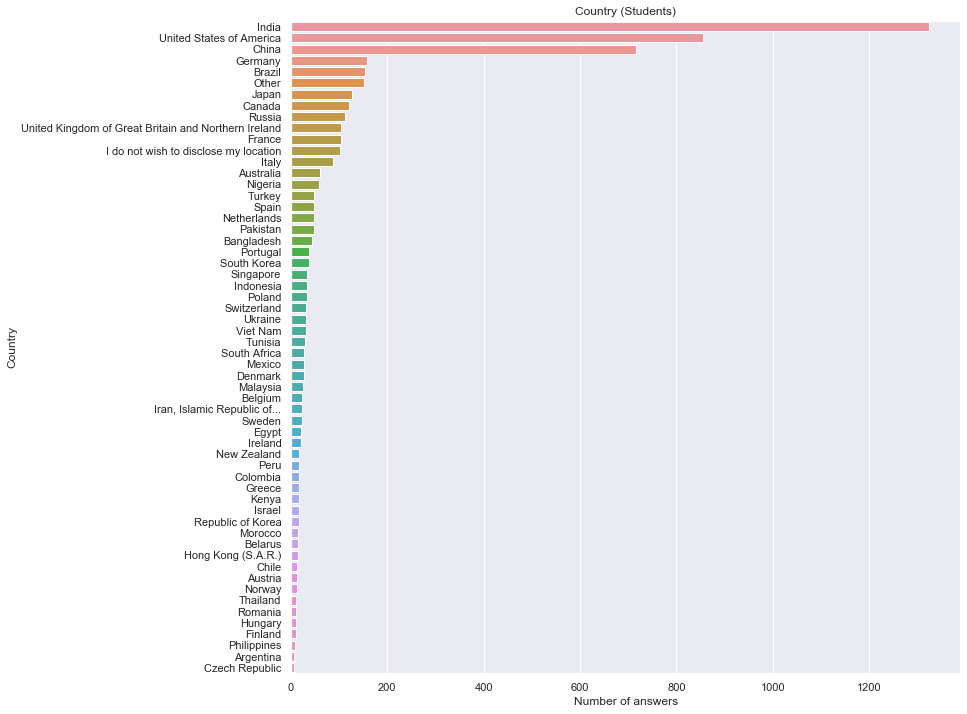

In [5]:
#Where are our students from?
plt.figure(figsize=(12,12))
sns.countplot(y=prof['Q3'], data=prof, order=prof['Q3'].value_counts().index)
plt.title("Country (non-Students)")
plt.xlabel("Number of answers")
plt.ylabel("Country")
plt.show()

plt.figure(figsize=(12,12))
ax = sns.countplot(y=students['Q3'], data=students, order=students['Q3'].value_counts().index)
plt.title("Country (Students)")
plt.xlabel("Number of answers")
plt.ylabel("Country")
plt.show()

**4. Highest education attained or planned**<br>
Again, as we could expect, most students are in the middle of their studies, whereas most of the respondents who already work has a Master's degree, and there are more people with a Doctoral degree.

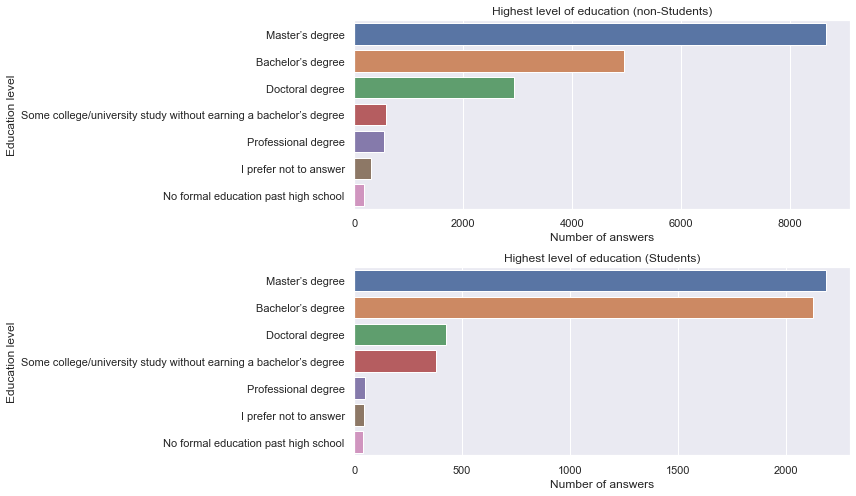

In [6]:
plt.figure(figsize=(12,7))

plt.subplot(211)
sns.countplot(y=prof['Q4'], data=prof, order=prof['Q4'].value_counts().index)
plt.title("Highest level of education (non-Students)")
plt.ylabel("Education level")
plt.xlabel("Number of answers")

plt.subplot(212)
sns.countplot(y=students['Q4'], data=students, order=students['Q4'].value_counts().index)
plt.title("Highest level of education (Students)")
plt.ylabel("Education level")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

**5. Undergraduate major**<br>
Top3 majors are the same for both groups.  Also, we can see that a Business discipline and Physics/Astronomy is more common among professionals than among current students participated in this survey.

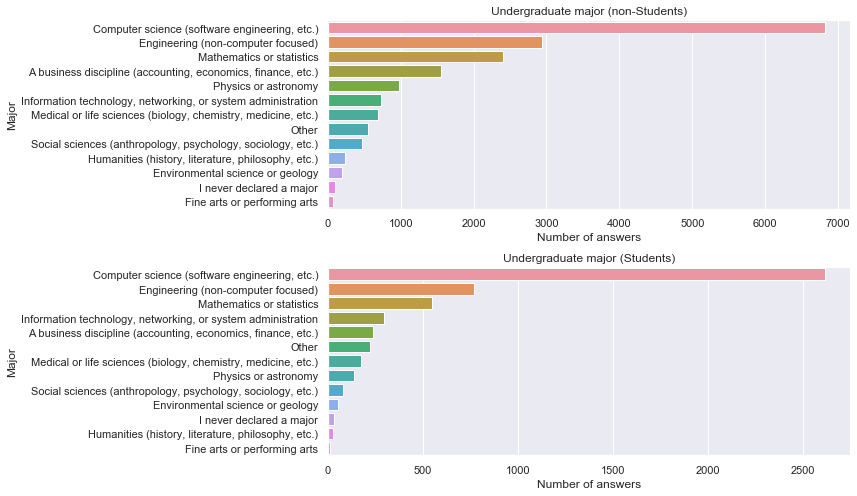

In [7]:
plt.figure(figsize=(12,7))

plt.subplot(211)
sns.countplot(y=prof['Q5'], data=prof, order=prof['Q5'].value_counts().index)
plt.title("Undergraduate major (non-Students)")
plt.ylabel("Major")
plt.xlabel("Number of answers")

plt.subplot(212)
sns.countplot(y=students['Q5'], data=students, order=students['Q5'].value_counts().index)
plt.title("Undergraduate major (Students)")
plt.ylabel("Major")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

We already know that CS, DS, Engineering and other related fields are less popular among woman.<br>
I thought it would be interesting to compare Gender and Undergraduate Major of student respondents. The chart below allows us to see a situation with gender diversity for different majors.<br>
* Best case is with Humanities: 41% Female vs. 48% Male
* On the second places are Fine arts and Social sciences: 33-35% Female vs. 61-67% Male.
* And the least number of woman study Engineering (14%), Physics/astronomy (14%), Computer Science (17%)

In [8]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)
pd.crosstab(index=students['Q5'], columns=students['Q1'], normalize='index').style.background_gradient(cmap, low=.5, high=0, axis=1).format("{:.0%}")

Q1,Female,Male,Prefer not to say,Prefer to self-describe
Q5,,,,
"A business discipline (accounting, economics, finance, etc.)",30%,70%,0%,0%
"Computer science (software engineering, etc.)",17%,82%,1%,0%
Engineering (non-computer focused),14%,85%,1%,0%
Environmental science or geology,19%,80%,2%,0%
Fine arts or performing arts,33%,67%,0%,0%
"Humanities (history, literature, philosophy, etc.)",41%,48%,7%,3%
I never declared a major,24%,73%,3%,0%
"Information technology, networking, or system administration",21%,79%,0%,0%
Mathematics or statistics,28%,70%,1%,1%


**6. What specific programming language do you use?**<br>
* Python and R are the most popular between Students and Professionals as most often used languages.
* SQL is on the 2nd place for regular usage and the 3d place as a most frequently used language among nonstudents but doesn't have the same popularity between students, who prefer C/C++ or Java.
* Given that most students study CS they could use C/C++ or Java more often for their assignments and side projects. Let's look at it closer.

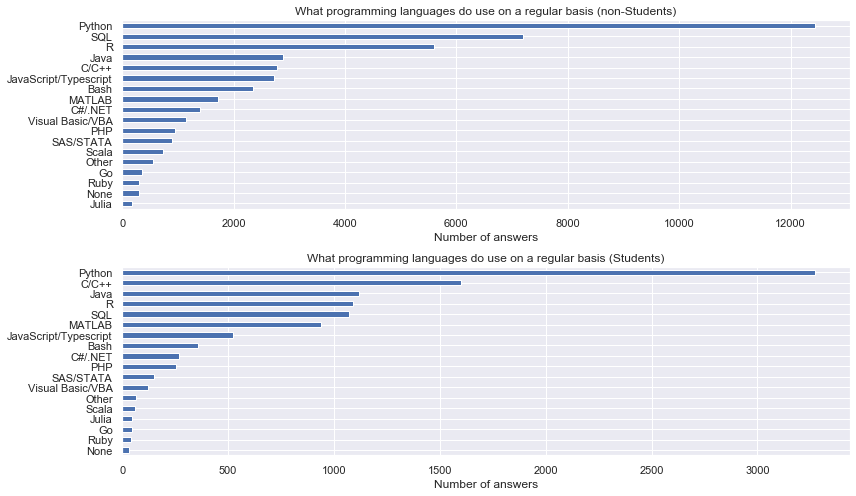

In [9]:
#Programming languages
lang = data[['Q6','Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 
           'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14',
           'Q16_Part_15', 'Q16_Part_16', 'Q16_Part_17', 'Q16_Part_18']]
columns = {'Q6': 'Title',
           'Q16_Part_1': 'Python',
           'Q16_Part_2': 'R',
           'Q16_Part_3': 'SQL',
           'Q16_Part_4': 'Bash',
           'Q16_Part_5': 'Java',
           'Q16_Part_6': 'JavaScript/Typescript',
           'Q16_Part_7': 'Visual Basic/VBA',
           'Q16_Part_8': 'C/C++',
           'Q16_Part_9': 'MATLAB',
           'Q16_Part_10': 'Scala',
           'Q16_Part_11': 'Julia',
           'Q16_Part_12': 'Go',
           'Q16_Part_13': 'C#/.NET',
           'Q16_Part_14': 'PHP',
           'Q16_Part_15': 'Ruby',
           'Q16_Part_16': 'SAS/STATA',
           'Q16_Part_17': 'None',
           'Q16_Part_18': 'Other'}
lang_binary = lang.rename(columns=columns).fillna(0).replace('[^\\d]',1, regex=True)
lang = pd.concat([data, lang_binary], axis=1)

plt.figure(figsize=(12,7))

plt.subplot(211)
lang[lang['Q6'] != 'Student'][['Python','R','SQL','Bash','Java','JavaScript/Typescript',
                                             'Visual Basic/VBA','C/C++','MATLAB','Scala','Julia','Go',
                                             'C#/.NET','PHP','Ruby','SAS/STATA','None','Other']].sum().sort_values(ascending=True).plot.barh()
plt.title("What programming languages do use on a regular basis (non-Students)")
plt.xlabel("Number of answers")

plt.subplot(212)
lang[lang['Q6'] == 'Student'][['Python','R','SQL','Bash','Java','JavaScript/Typescript',
                                             'Visual Basic/VBA','C/C++','MATLAB','Scala','Julia','Go',
                                             'C#/.NET','PHP','Ruby','SAS/STATA','None','Other']].sum().sort_values(ascending=True).plot.barh()
plt.title("What programming languages do use on a regular basis (Students)")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

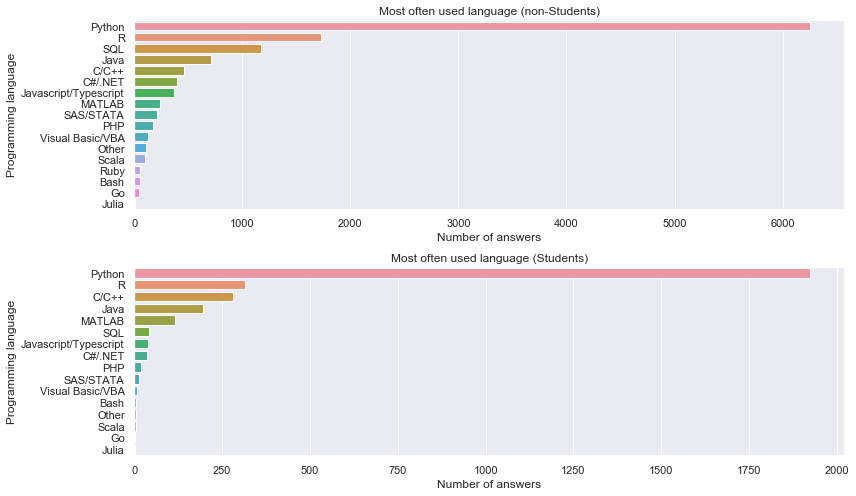

In [10]:
plt.figure(figsize=(12,7))

plt.subplot(211)
sns.countplot(y=prof['Q17'], data=prof, order=prof['Q17'].value_counts().index)
plt.title("Most often used language (non-Students)")
plt.ylabel("Programming language")
plt.xlabel("Number of answers")

plt.subplot(212)
sns.countplot(y=students['Q17'], data=students, order=students['Q17'].value_counts().index)
plt.title("Most often used language (Students)")
plt.ylabel("Programming language")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

* As expected, Python is used by students with any Major. 
* Students with CS Major also use C/C++ and Java a lot. 
* Students from Mathematics/Statics use mostly Python and R. 
* Participants who study Social Sciences use Python and R evenly.
* For me was a big surprise that Students with Fine arts or Humanities Majors use any programming language, but definitely, I'm biased and not very familiar with their curriculum.

In [11]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)
pd.crosstab(index=students['Q5'], columns=students['Q17'], normalize='index').style.background_gradient(cmap, low=.5, high=0, axis=1).format("{:.1%}")

Q17,Bash,C#/.NET,C/C++,Go,Java,Javascript/Typescript,Julia,MATLAB,Other,PHP,Python,R,SAS/STATA,SQL,Scala,Visual Basic/VBA
Q5,,,,,,,,,,,,,,,,
"A business discipline (accounting, economics, finance, etc.)",0.0%,0.8%,3.3%,0.0%,0.8%,0.0%,0.0%,1.6%,0.0%,0.0%,52.5%,32.0%,4.1%,2.5%,0.0%,2.5%
"Computer science (software engineering, etc.)",0.0%,1.6%,12.1%,0.1%,9.1%,1.9%,0.1%,1.6%,0.2%,0.9%,68.3%,2.6%,0.1%,1.2%,0.1%,0.1%
Engineering (non-computer focused),0.4%,0.9%,8.5%,0.0%,2.4%,0.4%,0.0%,10.9%,0.0%,0.0%,65.5%,8.7%,0.4%,0.9%,0.2%,0.7%
Environmental science or geology,0.0%,0.0%,3.6%,0.0%,0.0%,0.0%,0.0%,7.1%,0.0%,0.0%,60.7%,28.6%,0.0%,0.0%,0.0%,0.0%
Fine arts or performing arts,0.0%,11.1%,0.0%,0.0%,0.0%,0.0%,0.0%,11.1%,0.0%,0.0%,66.7%,11.1%,0.0%,0.0%,0.0%,0.0%
"Humanities (history, literature, philosophy, etc.)",0.0%,0.0%,7.7%,0.0%,7.7%,0.0%,0.0%,0.0%,0.0%,0.0%,76.9%,7.7%,0.0%,0.0%,0.0%,0.0%
I never declared a major,0.0%,0.0%,0.0%,0.0%,28.6%,7.1%,0.0%,7.1%,0.0%,0.0%,42.9%,14.3%,0.0%,0.0%,0.0%,0.0%
"Information technology, networking, or system administration",0.0%,1.8%,8.4%,0.0%,11.4%,0.6%,0.0%,3.6%,0.0%,1.2%,63.9%,7.2%,0.0%,1.8%,0.0%,0.0%
Mathematics or statistics,0.3%,0.6%,4.1%,0.0%,2.8%,0.3%,0.0%,4.4%,0.3%,0.0%,49.8%,34.2%,1.3%,1.9%,0.0%,0.0%


**7. Programming language you recommend an aspiring data scientist to learn first?**<br>
This is an interesting question. We can see if working professional know something that students don't know.<br>
So...<br>
* Python is the most recommended language to learn first.
* Working professionals recommend not to forget about SQL; it could be beneficial!

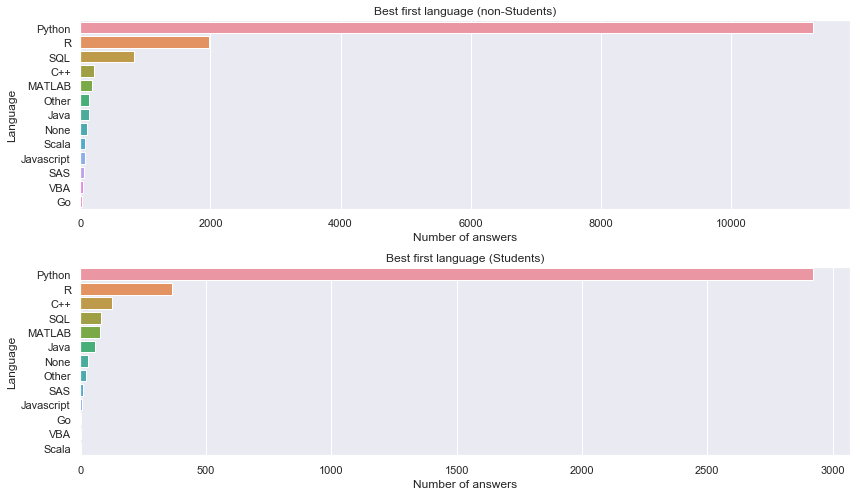

In [12]:
plt.figure(figsize=(12,7))

plt.subplot(211)
sns.countplot(y=prof['Q18'], data=prof, order=prof['Q18'].value_counts().index)
plt.title("Best first language (non-Students)")
plt.ylabel("Language")
plt.xlabel("Number of answers")

plt.subplot(212)
sns.countplot(y=students['Q18'], data=students, order=students['Q18'].value_counts().index)
plt.title("Best first language (Students)")
plt.ylabel("Language")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

**8. Platforms used to learn DS**<br>
* Coursera is on the first place as a platform to learn DS for both groups. Also, it's also a platform most used to learn DS.
* After Coursera goes Udemy, DataCamp, KaggleLearn, edX, and Udacity in a different order, but all of them are quite popular.
* TheSchool.ai and DataQuest are the least used platform to learn DS.

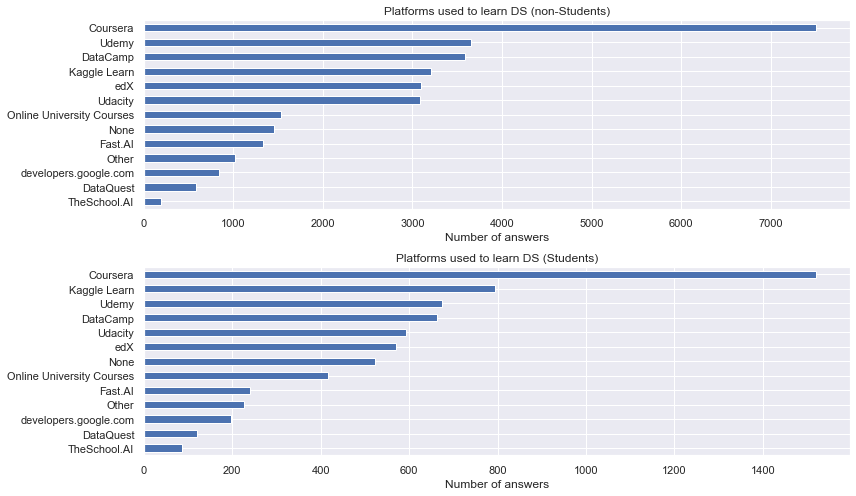

In [13]:
#Platforms used to learn DS
learn = data[['Q36_Part_1', 'Q36_Part_2', 'Q36_Part_3', 'Q36_Part_4', 'Q36_Part_5', 'Q36_Part_6', 'Q36_Part_7',
              'Q36_Part_8', 'Q36_Part_9', 'Q36_Part_10', 'Q36_Part_11', 'Q36_Part_12', 'Q36_Part_13']]

columns = {'Q36_Part_1': 'Udacity',
           'Q36_Part_2': 'Coursera',
           'Q36_Part_3': 'edX',
           'Q36_Part_4': 'DataCamp',
           'Q36_Part_5': 'DataQuest',
           'Q36_Part_6': 'Kaggle Learn',
           'Q36_Part_7': 'Fast.AI',
           'Q36_Part_8': 'developers.google.com',
           'Q36_Part_9': 'Udemy',
           'Q36_Part_10': 'TheSchool.AI',
           'Q36_Part_11': 'Online University Courses',
           'Q36_Part_12': 'None',
           'Q36_Part_13': 'Other'}

learn = learn.rename(columns=columns).fillna(0).replace('[^\\d]',1, regex=True)

learn_where = pd.concat([data, learn], axis=1)

plt.figure(figsize=(12,7))

plt.subplot(211)
learn_where[learn_where['Q6'] != 'Student'][['Coursera', 'Udemy', 'DataCamp', 'Kaggle Learn', 'Udacity',
                                                        'edX', 'None', 'Online University Courses', 'Fast.AI',
                                                        'Other', 'developers.google.com', 'DataQuest', 'TheSchool.AI']].sum().sort_values(ascending=True).plot.barh()
plt.title("Platforms used to learn DS (non-Students)")
plt.xlabel("Number of answers")

plt.subplot(212)
learn_where[learn_where['Q6'] == 'Student'][['Coursera', 'Udemy', 'DataCamp', 'Kaggle Learn', 'Udacity',
                                                        'edX', 'None', 'Online University Courses', 'Fast.AI',
                                                        'Other', 'developers.google.com', 'DataQuest', 'TheSchool.AI']].sum().sort_values(ascending=True).plot.barh()
plt.title("Platforms used to learn DS (Students)")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

In [ ]:
#Platform most used to learn DS
plt.figure(figsize=(12,7))

plt.subplot(211)
sns.countplot(y=prof['Q37'], data=prof, order=prof['Q37'].value_counts().index)
plt.title("Platform most used to learn DS (non-Students)")
plt.xlabel("Number of answers")

plt.subplot(212)
sns.countplot(y=students['Q37'], data=students, order=students['Q37'].value_counts().index)
plt.title("Platform most used to learn DS (Students)")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

**9. Favorite media sources on DS**<br>
* Kaggle forum is the favorite media source for both groups.
* On the 2nd place are Medium Blog Posts.
* Many respondents don't have one favorite media source.

In [ ]:
resource = data[['Q38_Part_1', 'Q38_Part_2', 'Q38_Part_3', 'Q38_Part_4', 'Q38_Part_5', 'Q38_Part_6', 'Q38_Part_7',
                 'Q38_Part_8', 'Q38_Part_9', 'Q38_Part_10', 'Q38_Part_11', 'Q38_Part_12', 'Q38_Part_13', 'Q38_Part_14',
                 'Q38_Part_15', 'Q38_Part_16', 'Q38_Part_17', 'Q38_Part_18', 'Q38_Part_19', 'Q38_Part_20',
                 'Q38_Part_21', 'Q38_Part_22']]

columns = {'Q38_Part_1': 'Twitter',
           'Q38_Part_2': 'Hacker News',
           'Q38_Part_3': 'r/machinelearning',
           'Q38_Part_4': 'Kaggle forums',
           'Q38_Part_5': 'Fastai forums',
           'Q38_Part_6': 'Siraj Raval YouTube Channel',
           'Q38_Part_7': 'DataTau News Aggregator',
           'Q38_Part_8': 'Linear Digressions Podcast',
           'Q38_Part_9': 'Cloud AI Adventures (YouTube)',
           'Q38_Part_10': 'FiveThirtyEight.com',
           'Q38_Part_11': 'ArXiv & Preprints',
           'Q38_Part_12': 'Journal Publications',
           'Q38_Part_13': 'FastML Blog',
           'Q38_Part_14': 'KDnuggets Blog',
           'Q38_Part_15': "O'Reilly Data Newsletter",
           'Q38_Part_16': 'Partially Derivative Podcast',
           'Q38_Part_17': 'The Data Skeptic Podcast',
           'Q38_Part_18': 'Medium Blog Posts',
           'Q38_Part_19': 'Towards Data Science Blog',
           'Q38_Part_20': 'Analytics Vidhya Blog',
           'Q38_Part_21': 'None/I do not know',
           'Q38_Part_22': 'Other'}

resource_binary = resource.rename(columns=columns).fillna(0).replace('[^\\d]',1, regex=True)
resource = pd.concat([data, resource_binary], axis=1)

plt.figure(figsize=(12,9))

plt.subplot(211)
resource[resource['Q6'] != 'Student'][['Twitter','Hacker News','r/machinelearning',
                                             'Kaggle forums','Fastai forums','Siraj Raval YouTube Channel',
                                             'DataTau News Aggregator','Linear Digressions Podcast',
                                             'Cloud AI Adventures (YouTube)','FiveThirtyEight.com',
                                             'ArXiv & Preprints','Journal Publications','FastML Blog',
                                             'KDnuggets Blog',"O'Reilly Data Newsletter",'Partially Derivative Podcast',
                                             'The Data Skeptic Podcast','Medium Blog Posts','Towards Data Science Blog',
                                             'Analytics Vidhya Blog','None/I do not know','Other']].sum().sort_values(ascending=True).plot.barh()
plt.title("Favorite media sources on DS (non-Students)")
plt.xlabel("Number of answers")

plt.subplot(212)
resource[resource['Q6'] == 'Student'][['Twitter','Hacker News','r/machinelearning',
                                             'Kaggle forums','Fastai forums','Siraj Raval YouTube Channel',
                                             'DataTau News Aggregator','Linear Digressions Podcast',
                                             'Cloud AI Adventures (YouTube)','FiveThirtyEight.com',
                                             'ArXiv & Preprints','Journal Publications','FastML Blog',
                                             'KDnuggets Blog',"O'Reilly Data Newsletter",'Partially Derivative Podcast',
                                             'The Data Skeptic Podcast','Medium Blog Posts','Towards Data Science Blog',
                                             'Analytics Vidhya Blog','None/I do not know','Other']].sum().sort_values(ascending=True).plot.barh()
plt.title("Favorite media sources on DS (Students)")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

**10. % Contribution of your ML/DS learning by categories**<br>
* University makes the most significant contribution to learning for Students
* Work has less impact to the learning process for nonStudents, Self-taught and Online courses contribute more
* Kaggle competitions make the least addition to learning for both Students and non-Students

In [ ]:
learn_contr = data[['Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5', 'Q35_Part_6']]

columns = {'Q35_Part_1': 'Self-taught',
           'Q35_Part_2': 'Online courses',
           'Q35_Part_3': 'Work',
           'Q35_Part_4': 'University',
           'Q35_Part_5': 'Kaggle comp.',
           'Q35_Part_6': 'Other'}

learn_contr = learn_contr.rename(columns=columns)
learn_contr = pd.concat([data['Q6'], learn_contr], axis=1)
learn_contr.loc[learn_contr.Q6 != 'Student', 'Q6'] = 'nonStudent'
learn_contr['Kaggle comp.'].loc[learn_contr['Kaggle comp.'].astype(float)<0] = 0 

#Create boxplot for each category
plt.figure(figsize=(12,12))

plt.subplot(231)
sns.boxplot(y=learn_contr['Self-taught'].astype(np.float), x=learn_contr['Q6'])
plt.title("Self-taught")
plt.ylabel("% Contribution")

plt.subplot(232)
sns.boxplot(y=learn_contr['Online courses'].astype(np.float), x=learn_contr['Q6'])
plt.title("Online courses (Coursera, Udemy, edX, etc.)")
plt.ylabel("% Contribution")

plt.subplot(233)
sns.boxplot(y=learn_contr['Work'].astype(np.float), x=learn_contr['Q6'])
plt.title("Work")
plt.ylabel("% Contribution")

plt.subplot(234)
sns.boxplot(y=learn_contr['University'].astype(np.float), x=learn_contr['Q6'])
plt.title("University")
plt.ylabel("% Contribution")

plt.subplot(235)
sns.boxplot(y=learn_contr['Kaggle comp.'].astype(np.float), x=learn_contr['Q6'])
plt.title("Kaggle competitions")
plt.ylabel("% Contribution")

plt.subplot(236)
sns.boxplot(y=learn_contr['Other'].astype(np.float), x=learn_contr['Q6'])
plt.title("Other")
plt.ylabel("% Contribution")

plt.tight_layout()
plt.show()

**11. Quality of online learning platforms and in-person bootcamps compared by traditional Institutions**<br>
* Both Students and nonStudents respondents find that Online learning platforms are better than Traditional Institutions.
* Majority of both groups don't have opinion about in-person Bootcamps.

In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(211)
sns.countplot(y=prof['Q39_Part_1'], data=prof, order=prof['Q39_Part_1'].value_counts().index)
plt.title("Online learning platforms and MOOCs vs. Traditional Institutions(non-Students)")
plt.xlabel("Number of answers")

plt.subplot(212)
sns.countplot(y=students['Q39_Part_1'], data=students, order=students['Q39_Part_1'].value_counts().index)
plt.title("Online learning platforms and MOOCs vs. Traditional Institutions (Students)")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(211)
sns.countplot(y=prof['Q39_Part_2'], data=prof, order=prof['Q39_Part_2'].value_counts().index)
plt.title("In-person bootcamps vs. Traditional Institutions(non-Students)")
plt.xlabel("Number of answers")

plt.subplot(212)
sns.countplot(y=students['Q39_Part_2'], data=students, order=students['Q39_Part_2'].value_counts().index)
plt.title("In-person bootcamps vs. Traditional Institutions (Students)")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

**12. Which better demonstrates expertise in data science: academic achievements or independent projects**<br>
* Nonstudents mostly responded that Independent projects are more/slightly more important than academic achievements
* There is an almost equal number of students who answered that Independent projects are much important and that Independent projects are equally important. 

In [ ]:
plt.figure(figsize=(12,7))

plt.subplot(211)
sns.countplot(y=prof['Q40'], data=prof, order=prof['Q40'].value_counts().index)
plt.title("Academic achievements vs. independent projects (non-Students)")
plt.xlabel("Number of answers")

plt.subplot(212)
sns.countplot(y=students['Q40'], data=students, order=students['Q40'].value_counts().index)
plt.title("Academic achievements vs. independent projects (Students)")
plt.xlabel("Number of answers")

plt.tight_layout()
plt.show()

**Summary:**<br>
* There is no big difference between Students and nonStudents in this survey. All respondents use mostly the same learning resources and methods. 
* It is better to invest time and efforts into independents projects as most of the nonStudents find them much or slightly more important than academic achievements.
* Most of the respondents have a better opinion about Online learning platforms and MOOCs than about Traditional institution.
* Nevertheless, it is expected that a Data Scientist has at least Bachelor degree, even better Master or Doctoral degree.